In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
def excVWN(n):
  # Constants
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;

    rs=(4*pi/3*n)**(-1/3); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return out


def excVWNp(n):
  # Constants
    Mp = 1800 #1836.152
    X1 = 0.75*(3.0/(2.0*pi))**(2.0/3.0);
    A  =  0.0310907;
    x0 = -0.10498;
    b  = 3.72744;
    c  = 12.9352;
    Q  = sqrt(4*c-b*b);
    X0 = x0*x0+b*x0+c;
 
    rs=1/((4*pi/3*(n / Mp**3 ))**(1/3)); # Added internal conversion to rs
  
    x=sqrt(rs); 
    X=x*x+b*x+c;

    out=-X1/rs+ A*(log(x*x/X)+2*b/Q*np.arctan(Q/(2*x+b))-(b*x0)/X0*(log((x-x0)*(x-x0)/X)+2*(2*x0+b)/Q*np.arctan(Q/(2*x+b)) ) );
    return Mp * out

In [4]:
#crear densidad gaussiana 3d protones y electrones 



S=[300, 300, 300];


a=5.66/0.52917721; # Lattice constant (converted from angstroms to bohrs)

R=a*np.diag(np.ones(3)); # Cubic lattice

# Code fragment to create columns of m1, m2, m3 indices
ms=np.arange(0,np.prod(S)).T; # Count from zero to S1*S2*s3-1 in a column vector
m1=ms%S[0];
m2=floor(ms/S[0])%S[1];
m3=floor(ms/(S[0]*S[1]))%S[2];



# Wrap indices to +/- Fourier convention
n1=m1-(m1>S[0]/2)*S[0];
n2=m2-(m2>S[1]/2)*S[1];
n3=m3-(m3>S[2]/2)*S[2];

# Gather indices into columns of a matrices
N=[n1, n2, n3];
M=[m1, m2, m3];


## Compute Cartesian coords of grid points
r=np.dot((R.T),np.dot(inv(diag(S)),M)); # Scale by 1/S(), mult by real-space vectors (L's)

# Compute reciprocal-space vectors and lengths
G=2*pi*np.dot(inv(R.T),N);
G2=sum( G**2, axis=1);

dr=r-np.dot(np.mat(diag(R)).T,np.ones([prod(S),1]).T)/2;
dr=np.sqrt(np.sum(np.array(dr)**2,0))

#print(shape(dr),shape(M))

sig=1
Sig=1/4
psi1=(1/(2*pi*sig**2)**(3/4))*exp(-dr**2/(4*sig**2))
psi2=(1/(2*pi*Sig**2)**(3/4))*exp(-dr**2/(4*Sig**2))

0.9999997322602728 normalization electron gaussian
0.9999999999999998 normalization proton gaussian


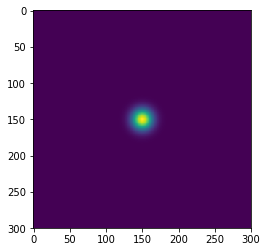

In [5]:
#probar densidad gaussiana
plt.imshow(reshape(psi2,S)[30,:,:])
print(np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S),"normalization electron gaussian")
print(np.sum(psi2*np.conj(psi2))*np.linalg.det(R)/np.prod(S),"normalization proton gaussian")

In [6]:
# crear transformada de fourier inversa 3d en array compacto (necesita inicializar lattice )
Psit1=np.fft.fftn(reshape(psi1,S), axes=(0, 1, 2))
np.sum(psi1*np.conj(psi1))*np.linalg.det(R)/np.prod(S)
# Operador de overlap
O=np.linalg.det(R)
ndens=psi1*psi1
Ndens=psi2*psi2
#poner todo junto
E_ex_e=real( np.trapz((excVWN(ndens))*ndens )*np.linalg.det(R)/np.prod(S));
E_ex_p=real( np.trapz((excVWNp(Ndens))*Ndens )*np.linalg.det(R)/np.prod(S));
print(E_ex_e, E_ex_p)

-0.2316501949474182 -1.4039352424449631


In [7]:
#checking that my implementation of Exc works
print(excVWN(1)) #should be -0.81015
print(excVWN(.1)) #should be -0.39621


print(excVWNp(1)) #should be -1.3573 (for Mp=1800)
print(excVWNp(.1)) #should be -0.63721 (for Mp=1800)

-0.810151378688813
-0.39620590148651225
-1.3573257648989483
-0.6372060569165849


In [8]:
a

10.695849883633501

-0.22945914990681968 nan agreement to 1E-9
0.9682158986536409


/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/Users/juanmendezvalderrama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


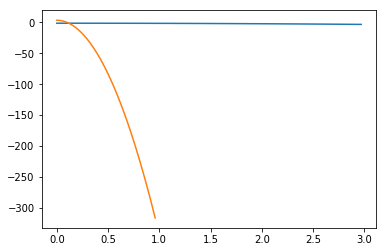

In [9]:
##from mpmath import *
#mp.dps = 15; mp.pretty = True

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
sig=1
Sig=1/40

N=100;
#U=10.695849883633501 /2
U=3
rr=np.arange(0,U,U/N)
ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
difr=U/N

plot(rr,log10(ndens2))
plot(rr,log10(Ndens2))
#plot(rr[1:],(1/(2*pi*sig**2)**(3/2))*rr[1:]/rr[1:])


Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
print(Exc_e,Exc_p, "agreement to 1E-9")
Norm1= difr*np.trapz(ndens2*rr*rr*4*np.pi)
Norm2= difr*np.trapz(Ndens2*rr*rr*4*np.pi)
print(Norm1)

In [35]:
def EPC_17(a,b,c,sig,Sig):
    
    lamb=(1/(2*np.pi*(Sig)*(sig)))**3
    alphe=1/(1/Sig**2+1/sig**2)
    
    N=100000;
    U=10000
    u=np.arange(0,U,U/N)

    
    
    out= -4*pi*(U/N)*np.trapz((u**2)*lamb*np.exp(-u**2 /(2*alphe) )/ (a-b*np.sqrt(lamb)*np.exp(-u**2 /(4*alphe) )+c*lamb*np.exp(-u**2 /(2*alphe) )))
    return out

def Energy(a,b,c,sig,Sig):
    M=1800
    Te=(3/8)*(1/sig**2)
    Tp=(3/8)*(1/Sig**2) /M
    Vcoul=np.sqrt(2/np.pi)/np.sqrt(sig**2 +Sig**2)
    #abc=np.sqrt(4*a*c-b**2)
    #EPC17pre= (-4*(np.pi**(3/2))*(sig**3)*(Sig**3))/(c*abc*((sig**2+Sig**2)**(3/2)))  
    #EPC17_1=(-1j*b+abc)*polylog( 3/2,   (b-1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #EPC17_2=(1j*b+abc)*polylog(  3/2,  (b+1j*abc)/(4*np.sqrt(2)*a* ((np.pi*sig*Sig)**(3/2))  ) )
    #SHO=0.5*(0.2*10)*Sig**2
    #EPC17=EPC17pre*(EPC17_1+EPC17_2)
    EPC17=EPC_17(a,b,c,sig,Sig)
    Vautointele=np.sqrt(1/np.pi)/sig
    Vautointprot=np.sqrt(1/np.pi)/Sig
    
    N=100000;
    U=100.695849883633501 /2
    #U=5

    rr=np.arange(0,U,U/N)
    ndens2=((1/(2*pi*sig**2)**(3/4))*exp(-rr**2/(4*sig**2)))**2
    Ndens2=((1/(2*pi*Sig**2)**(3/4))*exp(-rr**2/(4*Sig**2)))**2
    difr=U/N
    ndens2[np.where(ndens2<1E-20)]=1E-20
    Ndens2[np.where(Ndens2<1E-20)]=1E-20

    Exc_e= difr*np.trapz((excVWN(ndens2))*ndens2*rr*rr*4*np.pi)
    Exc_p= difr*np.trapz((excVWNp(Ndens2))*Ndens2*rr*rr*4*np.pi)
    
    print(EPC17)
    return Te+Tp -Vcoul+real(EPC17)#+Exc_e+Exc_p +0.5*Vautointele+0.5*Vautointprot 
    #return Exc_p

In [36]:

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(Energy(a,b,c,sig+h,Sig)-Energy(a,b,c,sig-h,Sig))/(2*h)
    Grad2=(Energy(a,b,c,sig,Sig+h)-Energy(a,b,c,sig,Sig-h))/(2*h)
    return np.array([real(Grad1),real(Grad2)])

'''

def gradEnergy(a,b,c,sig,Sig,h):
    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)
    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)
    return np.array([Grad1,Grad2])
'''

'\n\ndef gradEnergy(a,b,c,sig,Sig,h):\n    Grad1=(-Energy(a,b,c,sig+2*h,Sig)+8*Energy(a,b,c,sig+h,Sig)-8*Energy(a,b,c,sig-h,Sig)+Energy(a,b,c,sig-2*h,Sig))/(12*h)\n    Grad2=(-Energy(a,b,c,sig,Sig+2*h)+8*Energy(a,b,c,sig,Sig+h)-8*Energy(a,b,c,sig,Sig-h)+Energy(a,b,c,sig,Sig-2*h))/(12*h)\n    return np.array([Grad1,Grad2])\n'

In [37]:
sig=1
Sig=1/6
Energy(a,b,c,sig,Sig) #for Sig=1/2 and sig=1 should be -0.43294 For Sig=1/4 sig=1 should be -0.62090, -0.74004


-0.029115955315422756


-0.4336444380108479

For $\sigma$=1 and $\Sigma$=1/6  



For python radial integration

T=0.3823523324866351
EHart= 1.187635059721722
EPC=-0.029115955315422756
Exce= -0.23165018668984175
Excp=-2.088209566937999
Tot=-0.7789883167349063

For octave

S=[120,120,120]


T=0.38250
EHart=1.1876
EPC=-0.029118
Exce=-0.23165
Excp=-2.0882
Tot=-0.77886

S=[80,80,80]

For octave
T=0.38242
EHart= 1.1543
EPC=-0.029479
Exce=-0.23165
Excp=-2.0524
Tot=-0.77674

In [40]:

a,b,c=[2.35,2.4,3.2]   #for epc17-1
#a,b,c=[2.35,2.4,6.6]   #for epc17-2
presSig=np.array([0.99849115 ,0.10892036])

E0= Energy(a,b,c,presSig[0],presSig[1])
print(presSig,E0)

h=1E-5
grad1=gradEnergy(a,b,c,presSig[0],presSig[1],h)

step=0.0001
postsSig=presSig-step*grad1


E1= Energy(a,b,c, real(postsSig[0]), real(postsSig[1]))
delta=abs(E1-E0)
E0=real(E1)

print(postsSig,E1,delta, grad1)


[0.99849115 0.10892036] -0.401028781199523
[0.99848787 0.10894339] -0.40103419181439487 5.410614871859121e-06 [ 0.03281743 -0.23033563]


In [41]:

gamma = 1E-4 # Step size multiplier
precision = 1E-6  # Desired precision of result
max_iters = 1000  # Maximum number of iterations

# Derivative function

j=0
for i in range(max_iters):
    presSig = postsSig
    postsSig = presSig - gamma * gradEnergy(a,b,c,presSig[0],presSig[1],h)
    step = np.sqrt(np.sum((postsSig - presSig)**2))
    j=j+1
    print(step,Energy(a,b,c, real(postsSig[0]), real(postsSig[1])),real(postsSig[0]), real(postsSig[1]))
    if abs(step) <= precision:
        break
    
print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

2.3244398245850586e-05 -0.4010395923079778 0.9984845873352239 0.10896640524683676
2.322266005484969e-05 -0.40104498270717714 0.9984813072350456 0.10898939508987326
2.320095932677649e-05 -0.40105036303880315 0.9984780279557017 0.10901236312942103
2.317929595885903e-05 -0.4010557333295697 0.9984747494967119 0.10903530940292677
2.315766984878396e-05 -0.40106109360609604 0.9984714718576023 0.10905823394773562
2.3136080898457065e-05 -0.40106644389490603 0.9984681950378937 0.1090811368010936
2.3114529006159752e-05 -0.4010717842224302 0.9984649190371114 0.10910401800014546
2.3093014073506897e-05 -0.40107711461500445 0.9984616438547772 0.10912687758193684
2.307153600195659e-05 -0.40108243509887226 0.9984583694904183 0.10914971558341541
2.3050094689676023e-05 -0.4010877457001827 0.9984550959435597 0.1091725320414264
2.302869004022774e-05 -0.4010930464449931 0.9984518232137267 0.1091953269927185
2.3007321955229067e-05 -0.40109833735926853 0.998448551300447 0.10921810047394209
2.298599033470848e-

2.12041518472557e-05 -0.40154177036252575 0.9981541656790827 0.11120508907617294
2.1185771142202517e-05 -0.4015462567871881 0.99815096694271 0.11122603197436082
2.1167419244115324e-05 -0.40155073544396225 0.9981477689813948 0.1112469564261071
2.1149096080431877e-05 -0.40155520635172304 0.9981445717947157 0.11126786246022069
2.1130801583312655e-05 -0.4015596695292844 0.9981413753822532 0.11128875010544276
2.111253567932638e-05 -0.40156412499539906 0.9981381797435884 0.11130961939044093
2.109429830166854e-05 -0.4015685727687593 0.9981349848782992 0.11133047034381538
2.107608937977351e-05 -0.4015730128679967 0.9981317907859688 0.11135130299409635
2.105790884418236e-05 -0.4015774453116824 0.9981285974661767 0.11137211736974384
2.103975662421034e-05 -0.4015818701183277 0.9981254049185065 0.11139291349914765
2.102163265460816e-05 -0.40158628730638457 0.9981222131425397 0.11141369141063179
2.1003536862820467e-05 -0.4015906968942448 0.9981190221378595 0.11143445113244782
2.0985469182599066e-05

1.948230508441433e-05 -0.40195858532710044 0.9978349391489958 0.11323169838208752
1.9466513178316644e-05 -0.40196237324335066 0.9978318166466311 0.11325091283275113
1.9450743997013914e-05 -0.40196615502611777 0.9978286948791624 0.11327011142670768
1.9434997492497093e-05 -0.4019699306891787 0.9978255738462147 0.1132892941866987
1.9419273611184075e-05 -0.401973700246269 0.997822453547413 0.11330846113541188
1.9403572306111556e-05 -0.4019774637110841 0.9978193339823828 0.11332761229548799
1.9387893523046144e-05 -0.4019812210972774 0.9978162151507501 0.11334674768951342
1.9372237212615853e-05 -0.401984972418463 0.9978130970521417 0.11336586734002513
1.935660332537301e-05 -0.4019887176882132 0.9978099796861836 0.11338497126951042
1.9340991811454936e-05 -0.401992456920061 0.9978068630525021 0.1134040595004066
1.932540262008941e-05 -0.4019961901274983 0.9978037471507246 0.11342313205510024
1.9309835702023937e-05 -0.4019999173239778 0.9978006319804801 0.11344218895592872
1.9294291006192236e-05

1.799419095934936e-05 -0.40231233026148133 0.9975232166814361 0.11509587497043039
1.798046084021443e-05 -0.4023155619982849 0.9975201665727025 0.11511359484087968
1.796674899970522e-05 -0.40231878880864336 0.9975171171628843 0.11513130091806745
1.7953055399713614e-05 -0.40232201070285956 0.9975140684516425 0.11514899322029043
1.7939380002406602e-05 -0.40232522769120777 0.997511020438641 0.11516667176580792
1.7925722771508187e-05 -0.4023284397839339 0.9975079731235424 0.11518433657284255
1.7912083667339083e-05 -0.4023316469912551 0.9975049265060101 0.11520198765957729
1.78984626554278e-05 -0.40233484932336105 0.9975018805857065 0.11521962504416039
1.788485969718175e-05 -0.4023380467904133 0.997498835362297 0.11523724874470181
1.787127475316229e-05 -0.4023412394025447 0.9974957908354445 0.11525485877927155
1.7857707789089903e-05 -0.40234442716986063 0.9974927470048134 0.11527245516590545
1.7844158767084156e-05 -0.4023476101024384 0.9974897038700681 0.11529003792260134
1.7830627650820586e

1.6669763477406854e-05 -0.4026210247710865 0.9972126685675191 0.11685164336274012
1.6657734879787397e-05 -0.4026237985716442 0.9972096887292261 0.11686803240466065
1.6645721168073183e-05 -0.4026265683731795 0.9972067095567172 0.11688440935689137
1.663372231680795e-05 -0.4026293341835176 0.9972037310496871 0.11690077423434231
1.6621738294300528e-05 -0.4026320960104623 0.9972007532078301 0.11691712705189156
1.660976907445618e-05 -0.4026348538617983 0.997197776030841 0.11693346782439112
1.6597814627477668e-05 -0.4026376077452901 0.9971947995184145 0.11694979656666304
1.65858749266523e-05 -0.4026403576686817 0.9971918236702444 0.11696611329350243
1.657394994143407e-05 -0.40264310363969835 0.9971888484860271 0.11698241801967413
1.6562039645738005e-05 -0.40264584566604383 0.9971858739654578 0.11699871075991664
1.6550144011749997e-05 -0.40264858375540435 0.9971829001082342 0.11701499152894096
1.6538263010589595e-05 -0.4026513179154441 0.9971799269140502 0.11703126034142841
1.652639661352595e-

1.5514932489574337e-05 -0.40288461648858026 0.9969121031386827 0.11846349612917229
1.5504287374755302e-05 -0.4028870194934613 0.9969091896807869 0.11847872421802441
1.549365458314516e-05 -0.4028894192039146 0.9969062768588449 0.11849394160284166
1.5483034097607676e-05 -0.4028918156260082 0.9969033646725756 0.11850914829597331
1.5472425892625525e-05 -0.4028942087657943 0.9969004531217013 0.11852434430974368
1.5461829947500763e-05 -0.40289659862931143 0.9968975422059428 0.11853952965645598
1.5451246240341975e-05 -0.4028989852225832 0.9968946319250199 0.11855470434839122
1.5440674749785117e-05 -0.40290136855161884 0.9968917222786555 0.11856986839780959
1.543011545345824e-05 -0.4029037486224133 0.9968888132665726 0.1185850218169488
1.5419568330499462e-05 -0.40290612544094684 0.996885904888492 0.1186001646180252
1.5409033356631477e-05 -0.4029084990131851 0.996882997144136 0.11861529681323096
1.5398510514915725e-05 -0.40291086934508036 0.9968800900332268 0.11863041841474137
1.538799978000676

1.4498561864389859e-05 -0.40311163787838555 0.996621009854159 0.11994944963759668
1.4489058893690883e-05 -0.4031137365188682 0.9966181592554814 0.11996365551366273
1.447956627458502e-05 -0.4031158324106684 0.9966153092656994 0.11997785183000687
1.4470083986406206e-05 -0.40311792555857556 0.9966124598845595 0.11999203859699914
1.4460612014853386e-05 -0.4031200159673688 0.9966096111118032 0.12000621582499432
1.4451150342779234e-05 -0.4031221036418168 0.9966067629471752 0.12002038352433053
1.4441698952160223e-05 -0.40312418858667665 0.9966039153904176 0.12003454170532729
1.4432257826262649e-05 -0.4031262708066951 0.9966010684412762 0.12004869037828803
1.4422826947095663e-05 -0.40312835030660815 0.9965982220994956 0.12006282955349784
1.4413406298420823e-05 -0.4031304270911409 0.9965953763648201 0.12007695924122547
1.4403995862925114e-05 -0.40313250116500776 0.9965925312369923 0.12009107945172187
1.4394595623134698e-05 -0.4031345725329129 0.9965896867157593 0.12010519019522137
1.43852055629

1.3588301911079581e-05 -0.4033104759231948 0.9963361323614849 0.12133762730594805
1.3579763142155482e-05 -0.4033123194436081 0.9963333419984476 0.12135091729620828
1.3571233159288959e-05 -0.4033141606490047 0.9963305522193809 0.12136419869305587
1.3562711947207719e-05 -0.4033159995432179 0.9963277630240474 0.12137747150529571
1.3554199493828384e-05 -0.40331783613007155 0.9963249744122115 0.12139073574172105
1.3545695784064463e-05 -0.4033196704133817 0.9963221863836362 0.12140399141110958
1.3537200805432535e-05 -0.4033215023969568 0.9963193989380835 0.12141723852222625
1.3528714545167123e-05 -0.40332333208459664 0.9963166120753194 0.12143047708382404
1.3520236987217545e-05 -0.40332515948009295 0.9963138257951051 0.12144370710463875
1.351176811972532e-05 -0.4033269845872295 0.9963110400972055 0.12145692859339507
1.3503307927647112e-05 -0.4033288074097815 0.9963082549813864 0.1214701415588027
1.349485639760237e-05 -0.4033306279515164 0.9963054704474102 0.12148334600955718
1.34864135176252

1.2768068666776208e-05 -0.40348558747237917 0.9960572159531771 0.12263793297970427
1.2760352177780287e-05 -0.4034872152463429 0.9960544834029891 0.12265039731912403
1.2752643218159214e-05 -0.4034888410542967 0.9960517514136991 0.12266285388942122
1.2744941776877336e-05 -0.4034904648993441 0.9960490199850863 0.12267530269814453
1.2737247843108455e-05 -0.40349208678458176 0.9960462891169317 0.12268774375283209
1.2729561402459906e-05 -0.40349370671310075 0.9960435588090153 0.12270017706100733
1.2721882448205394e-05 -0.40349532468798477 0.9960408290611198 0.12271260263018757
1.2714210966572574e-05 -0.40349694071231246 0.9960380998730243 0.12272502046787542
1.2706546947255109e-05 -0.4034985547891556 0.9960353712445095 0.1227374305815635
1.2698890379881367e-05 -0.4035001669215801 0.9960326431753556 0.12274983297873387
1.2691241252176225e-05 -0.4035017771126449 0.9960299156653447 0.12276222766685668
1.2683599554302395e-05 -0.4035033853654035 0.9960271887142573 0.12277461465339179
1.2675965274

1.201094078680978e-05 -0.40364344299711774 0.995778671465938 0.12388223614867361
1.2003944899146462e-05 -0.4036448835244894 0.9957759955600312 0.12389393803829535
1.1996955500864923e-05 -0.4036463223749757 0.9957733201931673 0.12390563288132267
1.1989972581637513e-05 -0.40364775955110604 0.9957706453651419 0.12391732068426176
1.1982996131826642e-05 -0.4036491950554049 0.9957679710757503 0.12392900145360908
1.197602614550642e-05 -0.4036506288903924 0.9957652973247895 0.12394067519585555
1.1969062609650862e-05 -0.4036520610585833 0.9957626241120533 0.12395234191747823
1.1962105517816356e-05 -0.40365349156248775 0.9957599514373384 0.1239640016249483
1.195515486044107e-05 -0.4036549204046111 0.9957572793004411 0.12397565432472729
1.1948210628971395e-05 -0.4036563475874538 0.9957546077011576 0.12398730002326808
1.1941272811803845e-05 -0.4036577731135115 0.9957519366392846 0.1239989387270119
1.1934341403753334e-05 -0.4036591969852745 0.9957492661146193 0.124010570442395
1.1927416392803022e-0

In [ ]:
#Minimum at [0.907835159632385 0.13280468946499] With energy -0.416377344520392  within 60 iterations

In [103]:
%pylab inline
a=2.35; b=2.4; c=3.2;
sig=1
Sig=1/2 *1E-5
pre=1/(2*pi*sig*Sig)**3
al=0.5*(1/sig**2+1/Sig**2)

N=10000
U=1000
u=np.arange(0,U,U/N)


out=-4*np.pi*pre*al**(-1.5)*sum( (u**2 *exp(-u**2))/(a-b*sqrt(pre*exp(-u**2))+c*pre*exp(-u**2)) )*U/N;
print(out,Energy(a,b,c,sig,Sig))

Populating the interactive namespace from numpy and matplotlib


NameError: name 'Energy' is not defined

Populating the interactive namespace from numpy and matplotlib


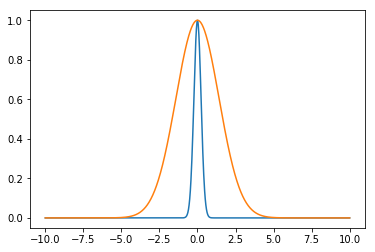

In [16]:
%pylab inline
cx=np.linspace(-10,10,1000)
plot(cx,np.exp(-0.5*cx**2 /(2*(1/6)**2) ))
plot(cx,np.exp(-0.5*cx**2 /(2*(1)**2) ))

In [8]:
#do not erase, converged calculation for the epc functional 

print("Minimum at", postsSig, "With energy",Energy(a, b, c, real(postsSig[0]), real(postsSig[1]))," within" , j, "iterations")
    

Minimum at [0.960089147599263 0.185027812603674] With energy -0.427957172507869  within 10000 iterations


In [ ]:
 ssig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
ssig =  6.043304402648485
octave:38> sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =    6.303874680199510e-01


sSig=sum(Npro.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  1.261719557959719
octave:49> sSig=sum(nele.*dr.*dr)*det(gbl_R)/prod(gbl_S)
sSig =  6.116323678266423